# Classify Enzymes

### Import Libraries

In [13]:
# Import libraries
import os
import time
import string
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectFromModel

### Import Data from filepath; omit the first column

In [3]:
#### Import data ####

##Define filepaths
filepath = r"C:/Users/Swata/OneDrive/Documents/Final_data/"

hydrolases_p = r"C:\Users\Swata\OneDrive\Documents\Final_data\Hydrolases.csv"
isomerases_p = r"C:\Users\Swata\OneDrive\Documents\Final_data\Isomerases.csv"
ligases_p = r"C:\Users\Swata\OneDrive\Documents\Final_data\Ligases.csv"
oxidoreductases_p = r"C:\Users\Swata\OneDrive\Documents\Final_data\Oxidoreductases.csv"
lyases_p = r"C:\Users\Swata\OneDrive\Documents\Final_data\Lyases.csv"
translocases_p = r"C:\Users\Swata\OneDrive\Documents\Final_data\Translocases.csv"
transferases_p = r"C:\Users\Swata\OneDrive\Documents\Final_data\Transferases.csv"

## Load data and drop the first row containing the row numbers
oxidoreductases = pd.read_csv(oxidoreductases_p).drop('Unnamed: 0',axis=1)
transferases = pd.read_csv(transferases_p).drop('Unnamed: 0',axis=1)
hydrolases = pd.read_csv(hydrolases_p).drop('Unnamed: 0',axis=1)
lyases = pd.read_csv(lyases_p).drop('Unnamed: 0',axis=1)
isomerases = pd.read_csv(isomerases_p).drop('Unnamed: 0',axis=1)
ligases = pd.read_csv(ligases_p).drop('Unnamed: 0',axis=1)
translocases = pd.read_csv(translocases_p).drop('Unnamed: 0',axis=1)

### Plot the amount of instnces per class

21169 56357 37912 14304 8772 16516 7295
['oxidoreductases', 'transferases', 'hydrolases', 'lyases', 'isomerases', 'ligases', 'translocases']


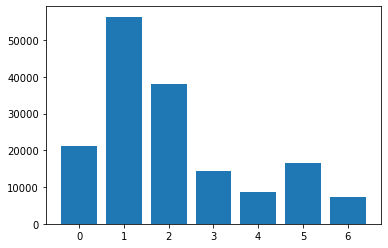

In [3]:
print(
oxidoreductases.shape[0],
transferases.shape[0],
hydrolases.shape[0],
lyases.shape[0],
isomerases.shape[0],
ligases.shape[0],
translocases.shape[0]
) # print the number of instance per class
enzymes_instances = [oxidoreductases.shape[0],
transferases.shape[0],
hydrolases.shape[0],
lyases.shape[0],
isomerases.shape[0],
ligases.shape[0],
translocases.shape[0]]

enzyme_names = ['oxidoreductases',
'transferases',
'hydrolases',
'lyases',
'isomerases',
'ligases',
'translocases']
plt.bar(range(7),height=enzymes_instances)
print(enzyme_names)

### Add labels and concatenate all data in a single dataframe

In [4]:
# Add labels:
oxidoreductases["label"] = ["Oxi" for i in range(len(oxidoreductases))]
transferases["label"] = ["trf" for i in range(len(transferases))]
hydrolases["label"] = ["hyd" for i in range(len(hydrolases))]
lyases["label"] = ["lys" for i in range(len(lyases))]
isomerases["label"] = ["iso" for i in range(len(isomerases))]
ligases["label"] = ["lig" for i in range(len(ligases))]
translocases["label"] = ["trl" for i in range(len(translocases))]

# Concat all the data
# data = pd.concat([oxidoreductases,transferases,hydrolases,lyases,isomerases,ligases,translocases],axis=0)
data = pd.concat([oxidoreductases,lyases,isomerases,ligases,translocases],axis=0)
data2 = pd.concat([transferases,hydrolases])

### Create the feature and labels matrices

### Train a random-forest model to select features

In [6]:
rf_x = data.iloc[:,:106]
rf_y = data.iloc[:,106:]  

In [8]:
X_train, X_test, y_train, y_test = train_test_split(rf_x, rf_y, test_size=0.05)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)
model = RandomForestClassifier(n_estimators=350, criterion='gini', max_depth=None, min_samples_split=2,
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', 
                               max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=True, 
                               n_jobs=None, random_state=2022, verbose=1, warm_start=False, class_weight=None,
                               ccp_alpha=0.0, max_samples=None)

In [9]:
model.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:  9.4min finished


RandomForestClassifier(max_features='sqrt', n_estimators=350, oob_score=True,
                       random_state=2022, verbose=1)

In [19]:
imp_features = model.feature_importances_ 
imp_features

In [23]:
sorted_idx = imp_features.argsort()
imp_features[sorted_idx]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.70986185e-07, 1.16586230e-06, 1.74649944e-06,
       4.83000269e-05, 5.15232587e-05, 5.32403325e-05, 5.58818402e-05,
       5.60735008e-05, 5.76442987e-05, 6.39743071e-03, 7.75221161e-03,
       7.76198920e-03, 7.78194778e-03, 7.78460558e-03, 7.99796361e-03,
       8.07213399e-03, 8.16421966e-03, 8.21401047e-03, 8.30253343e-03,
       8.42476966e-03, 8.81177154e-03, 8.87758348e-03, 9.12190554e-03,
       9.21296967e-03, 9.29024439e-03, 9.43223382e-03, 9.48212983e-03,
       9.48640255e-03, 9.57512343e-03, 9.65943368e-03, 9.73860010e-03,
       9.96063714e-03, 9.96575776e-03, 9.99883166e-03, 1.00002974e-02,
       1.00155921e-02, 1.00977647e-02, 1.01070602e-02, 1.01158236e-02,
       1.01983311e-02, 1.02610533e-02, 1.05512897e-02, 1.06255218e-02,
       1.06833585e-02, 1.07567182e-02, 1.07666471e-02, 1.08994797e-02,
      

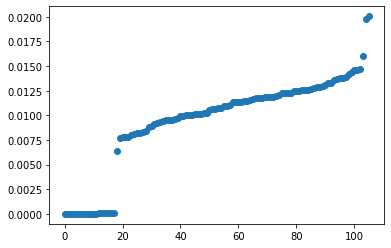

In [27]:
plt.scatter(range(len(imp_features)),imp_features[sorted_idx])

In [36]:
imp_features[sorted_idx] > 0.005    ## 0.005 visual threshold
sorted_idx,

True

In [44]:
sorted_idx_trim = sorted_idx[18:]
sorted_idx_trim.sort()
sorted_idx_trim

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  40,  41,  42,  43,  44,
        45,  46,  47,  48,  49,  50,  51,  55,  56,  57,  58,  59,  60,
        61,  62,  63,  64,  65,  66,  67,  68,  69,  73,  74,  75,  76,
        77,  78,  82,  83,  84,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100, 101, 102, 103, 104, 105], dtype=int64)

In [45]:
selected_features = rf_x.columns[sorted_idx_trim]
selected_features

Index(['mol_w', 'Residue', 'avg_res_w', 'charge', 'Iso_e_point',
       'Mol_ext_coef', 'Mol_ext_coef_cys', 'ext_coef_mg', 'ext_coef_mg_cys',
       'Imp_express_inclu_bodies', 'Anum', 'Amole%', 'Adhfs', 'Cnum', 'Cmole%',
       'Cdhfs', 'Dnum', 'Dmole%', 'Ddhfs', 'Enum', 'Emole%', 'Edhfs', 'Fnum',
       'Fmole%', 'Fdhfs', 'Gnum', 'Gmole%', 'Gdhfs', 'Hnum', 'Hmole%', 'Hdhfs',
       'Inum', 'Imole%', 'Idhfs', 'Knum', 'Kmole%', 'Kdhfs', 'Lnum', 'Lmole%',
       'Ldhfs', 'Mnum', 'Mmole%', 'Mdhfs', 'Nnum', 'Nmole%', 'Ndhfs', 'Pnum',
       'Pmole%', 'Pdhfs', 'Qnum', 'Qmole%', 'Qdhfs', 'Rnum', 'Rmole%', 'Rdhfs',
       'Snum', 'Smole%', 'Sdhfs', 'Tnum', 'Tmole%', 'Tdhfs', 'Vnum', 'Vmole%',
       'Vdhfs', 'Wnum', 'Wmole%', 'Wdhfs', 'Ynum', 'Ymole%', 'Ydhfs', 'tiny',
       'tiny_mol', 'small', 'small_mol', 'aliphatic', 'aliphatic_mol',
       'aromatic', 'aromatic_mol', 'non-polar', 'non-polar_mol', 'polar',
       'polar_mol', 'charged', 'charged_mol', 'basic', 'basic_mol', 'acidic',
   

## THE ANN

### 1. Create the feature and label matrices and split them into train-test sets

In [18]:
train, test = train_test_split(data, test_size=0.10)   # creating a train-test split

,mol_w,Residue,avg_res_w,charge,Iso_e_point,Mol_ext_coef,Mol_ext_coef_cys,ext_coef_mg,ext_coef_mg_cys,Imp_express_inclu_bodies,...,non-polar_mol,polar,polar_mol,charged,charged_mol,basic,basic_mol,acidic,acidic_mol,label
13516,34912.05,323.0,108.087,-2.5,5.9013,12950.0,13325.0,0.371,0.382,0.732,...,57.276,138.0,42.724,73.0,22.601,37.0,11.455,36.0,11.146,Oxi
13954,43231.95,405.0,106.746,3.5,6.8154,27850.0,28100.0,0.644,0.650,0.548,...,60.247,161.0,39.753,103.0,25.432,58.0,14.321,45.0,11.111,lys
3585,59112.27,544.0,108.662,-9.5,5.3848,47790.0,47915.0,0.808,0.811,0.548,...,58.824,224.0,41.176,140.0,25.735,69.0,12.684,71.0,13.051,lig
6052,37895.53,359.0,105.559,-4.0,5.7957,26930.0,27180.0,0.711,0.717,0.580,...,62.953,133.0,37.047,85.0,23.677,43.0,11.978,42.0,11.699,lys
5894,19039.08,181.0,105.188,10.5,9.9430,12950.0,13200.0,0.680,0.693,0.895,...,60.773,71.0,39.227,40.0,22.099,26.0,14.365,14.0,7.735,trl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4122,38214.98,335.0,114.075,20.5,10.0985,79870.0,79995.0,2.090,2.093,0.809,...,59.104,137.0,40.896,84.0,25.075,56.0,16.716,28.0,8.358,Oxi
5796,37795.37,336.0,112.486,0.0,6.5055,32890.0,33140.0,0.870,0.877,0.551,...,55.655,149.0,44.345,97.0,28.869,50.0,14.881,47.0,13.988,lig
16240,51975.48,466.0,111.535,-2.0,6.3045,61880.0,62130.0,1.191,1.195,0.593,...,57.725,197.0,42.275,126.0,27.039,66.0,14.163,60.0,12.876,lig
4810,28951.46,264.0,109.665,-5.5,4.8576,25440.0,25690.0,0.879,0.887,0.512,...,56.818,114.0,43.182,58.0,21.970,27.0,10.227,31.0,11.742,iso


In [9]:
class_names = ['Oxi','trf', 'hyd', 'lys', 'iso', 'lig', 'trl']

In [76]:
x = data.loc[:,selected_features]
y = data.loc[:,["label"]]
y = pd.get_dummies(y)
x_np = x.to_numpy() # the features (88 features)
y_np = y.to_numpy()  # labels

### 2. Normalize the features (mean-normalization) 

In [77]:
x_norm = np.zeros_like(x_np)   # make an empty array
for i in range(x_np.shape[1]): 
    tmp_arr = x_np[:,i]    # temporary array for each col
    mean = np.mean(tmp_arr) # mean of the col
    tmp_arr2 = (tmp_arr - mean) / len(x_np)   # normalixed feature vector
    x_norm[:,i] = tmp_arr2  # export
x_norm, x_norm.shape

(array([[ 1.04229630e+00,  9.29312509e-03,  1.56914873e-05, ...,
          8.16743065e-05,  1.20515393e-03,  5.38176656e-06],
        [-3.29257857e-01, -3.13781414e-03,  8.56045001e-05, ...,
          3.81954068e-05, -3.96468264e-04,  2.09555443e-07],
        [ 1.07420077e+00,  9.55761316e-03,  1.79102484e-05, ...,
          8.66261109e-05,  1.19046015e-03,  8.85469396e-07],
        ...,
        [ 4.17535666e-01,  3.29806220e-03,  8.28861506e-05, ...,
          9.51191167e-05,  1.10229746e-03,  1.06783553e-04],
        [ 4.18745111e-01,  3.29806220e-03,  8.47375670e-05, ...,
          9.28709681e-05,  1.08760368e-03,  1.04535405e-04],
        [ 1.82414625e+00,  1.61698149e-02,  2.53159143e-05, ...,
         -2.11968584e-05,  1.45494822e-03, -3.57755157e-05]]),
 (68056, 88))

In [79]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(72),
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(5,activation='softmax')
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(72),
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(5,activation='softmax')
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [80]:
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
1702/1702 [==============================] - 17s 9ms/step - loss: 1.4185 - accuracy: 0.4061
Epoch 2/50
1702/1702 [==============================] - 19s 11ms/step - loss: 1.3812 - accuracy: 0.4208
Epoch 3/50
1702/1702 [==============================] - 13s 7ms/step - loss: 1.3201 - accuracy: 0.4548
Epoch 4/50
1702/1702 [==============================] - 11s 7ms/step - loss: 1.2457 - accuracy: 0.4925
Epoch 5/50
1702/1702 [==============================] - 13s 7ms/step - loss: 1.2180 - accuracy: 0.5047
Epoch 6/50
1702/1702 [==============================] - 13s 8ms/step - loss: 1.1978 - accuracy: 0.5148
Epoch 7/50
1702/1702 [==============================] - 16s 9ms/step - loss: 1.1809 - accuracy: 0.5205
Epoch 8/50
1702/1702 [==============================] - 18s 11ms/step - loss: 1.1694 - accuracy: 0.5253
Epoch 9/50
1702/1702 [==============================] - 17s 10ms/step - loss: 1.1574 - accuracy: 0.5303
Epoch 10/50
1702/1702 [==============================] - 13s 8ms/step 

In [69]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

1015/1015 - 5s - loss: 1.2288 - accuracy: 0.5346 - 5s/epoch - 5ms/step

Test accuracy: 0.5345757007598877


In [96]:
final_result_class = []
precision_values = []
recall_values = []
f1_values = []
accuracy_values = []

for name in class_names:
  temp_df = test_df[test_df['label'] == name]
  X_test = list(temp_df['Fragment'])
  Y_test = le.transform(temp_df['Classes'])
  final_result_class.append(name)

  predictions = model.predict(X)
  Y_pred =[]
  for k in range(len(predictions)):
    temp_pred = predictions[k]
    max_value = max(temp_pred)
    result = np.where(temp_pred == max_value)[0][0]
    Y_pred.append(result)
  print(Y_test)
  print(Y_pred)
  precision_values.append(precision_score(Y_test, Y_pred, average = 'macro'))
  recall_values.append(recall_score(Y_test, Y_pred, average = 'macro'))
  f1_values.append(f1_score(Y_test, Y_pred, average = 'macro'))
  accuracy_values.append(accuracy_score(Y_test, Y_pred))
  #print(X_test)
results_df = pd.DataFrame()
results_df['Class Name'] = final_result_class
results_df['Precision'] = precision_values
results_df['Recall'] = recall_values
results_df['F1 Score'] = f1_values
results_df['Accuracy'] = accuracy_values
results_df.to_excel(r'C:\Users\Swata\OneDrive\Documents\DATARESULTS_FINAL.xlsx')

<function sklearn.metrics._classification.precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>

In [70]:
#Recall
m = tf.keras.metrics.Recall()
m.update_state(y_test,predicted)
m.result().numpy()

NameError: name 'predicted' is not defined

In [ ]:
#test:0.6979870796203613 train:accuracy: 0.7338   Recall: 0.63106084 Precision 0.7637592